#install BBOX-Label_Tool.
pip install pillow
git clone https://github.com/enriqueav/BBox-Label-Tool.git
cd BBox-Label-Tool

In [2]:
!pip install pydicom

     |████████████████████████████████| 7.0MB 3.9MB/s 


In [0]:
import math
import os
import shutil
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import pydicom
import cv2
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
%matplotlib inline
import os
os.chdir('/content/drive/My Drive/GL_Capstone/darkflow/')

options = {"model": "cfg/tiny-yolo-rsna.cfg", 
           "load": "bin/yolov2-tiny.weights",
           "batch": 8,
           "epoch": 100,
           "train": True,
           "annotation": "./annotations/",
           "dataset": "./images/"}

In [0]:
from darkflow.net.build import TFNet

In [0]:
#options = {"model": "cfg/yolov2-rsna.cfg", 
           "load": "bin/yolov2.weights",
           "batch": 8,
           "epoch": 10,
           "train": True,
           "gpu": 1.0,
           "annotation": "./annotations/",
           "dataset": "./images/"}

In [0]:
options = {"model": "cfg/yolov2-rsna.cfg", 
           "load": "bin/yolov2.weights",
           "batch": 8,
           "epoch": 2,
           "train": True,
           "gpu": 1.0,
           "annotation": "train_annotations/",
           "dataset": "train_images/"}

In [0]:
#checksnet pneumonia detection-  checknet weights, bottleneck features, apply softmax for three calsses of prediction

In [52]:
%ls

annotations/  darkflow/  labels.txt   sample_img/         train_images/
bin/          demo.gif   LICENSE      setup.py            Yolo_v1_colab.ipynb
build/        flow       preview.png  test/
cfg/          images/    README.md    train_annotations/


In [77]:
tfnet = TFNet(options)

Parsing ./cfg/yolov2.cfg
Parsing cfg/yolov2-rsna.cfg
Loading bin/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.10039329528808594s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | 

In [78]:
tfnet.train()


cfg/yolov2-rsna.cfg parsing train_annotations/
Parsing for ['pneumonia'] 
[====================>]100%  0a6a595658cf4f179e397e0d17310f67.xml
Statistics:
pneumonia: 6
Dataset size: 5
Dataset of 5 instance(s)
Training statistics: 
	Learning rate : 1e-05
	Batch size    : 5
	Epoch number  : 2
	Backup every  : 2000
step 1 - loss 231.55093383789062 - moving ave loss 231.55093383789062
Finish 1 epoch(es)
step 2 - loss 228.0966033935547 - moving ave loss 231.20550079345705
Finish 2 epoch(es)
Checkpoint at step 2


In [0]:
tfnet.savepb()

In [0]:
# load the model from the disk

In [0]:
# load a test image

In [82]:
# make a prediction for a sample image
import pprint as pp

original_img = cv2.imread("sample_img/0914700939a9497aac10a07cf7126d58.jpg")
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
results = tfnet.return_predict(original_img)
print(results)

[{'label': 'pneumonia', 'confidence': 0.6060463, 'topleft': {'x': 329, 'y': 0}, 'bottomright': {'x': 1023, 'y': 303}}, {'label': 'pneumonia', 'confidence': 0.61039, 'topleft': {'x': 694, 'y': 605}, 'bottomright': {'x': 1023, 'y': 855}}, {'label': 'pneumonia', 'confidence': 0.0, 'topleft': {'x': 592, 'y': 525}, 'bottomright': {'x': 1023, 'y': 1023}}, {'label': 'pneumonia', 'confidence': 0.61470294, 'topleft': {'x': 585, 'y': 535}, 'bottomright': {'x': 1023, 'y': 1023}}]


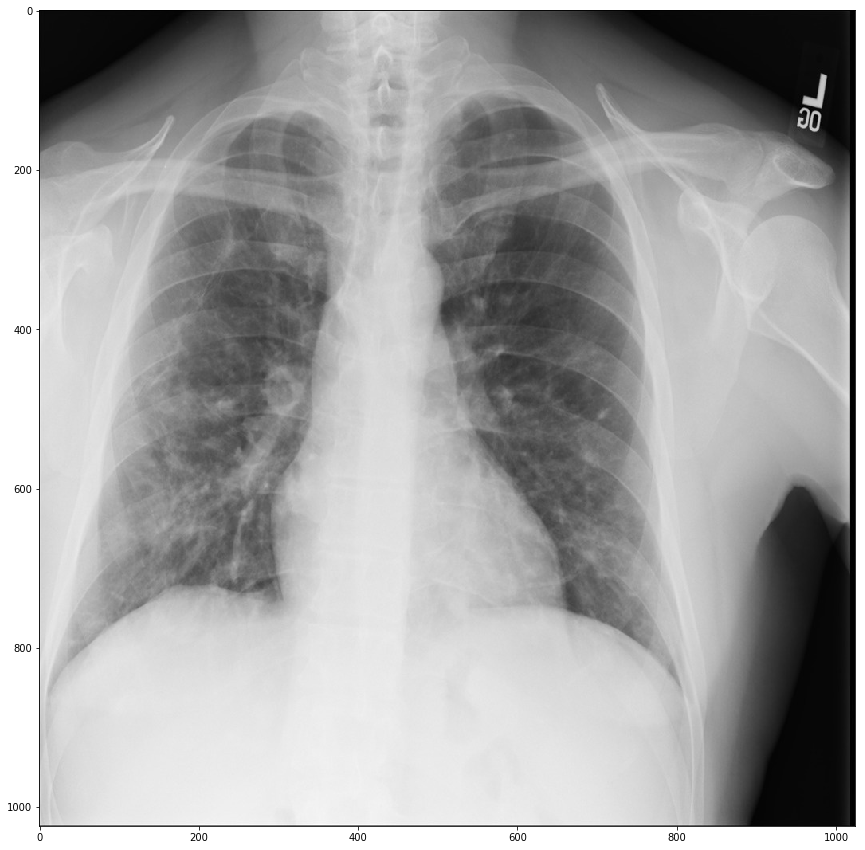

In [83]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(original_img)


In [0]:
def boxing(original_img , predictions):
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))
        
        if confidence > 0.3:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
        
    return newImage

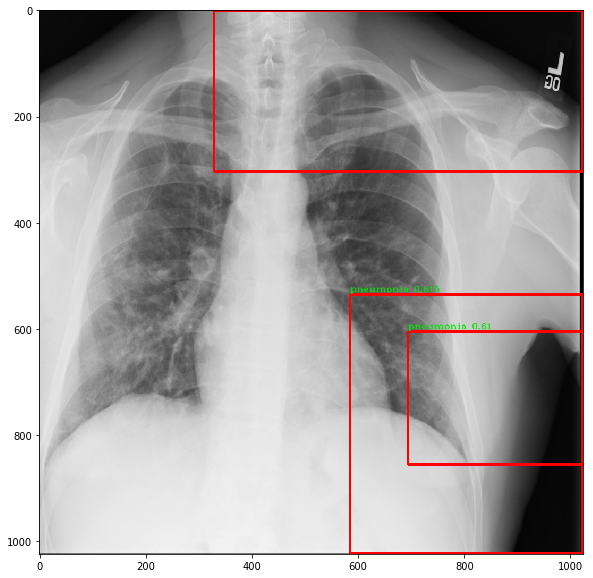

In [85]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(boxing(original_img, results))